<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Chapter%204/Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems from Chapter 4

In [4]:
#Importamos las librerías necesarias para resolver los problemas

import cvxpy as cp
import numpy as np
import math
import sympy as sp
from sympy import Integral, Matrix, pprint
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
#Definimos las funciones que se van a utilizar para calcular el gradiente y el Hessiano de las funciones

def gradient(f,*variables):

  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):

  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  for i in range(0,n):
    for j in range(0,n):
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

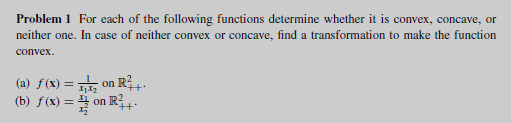

### (a)

La matriz Hessiana es:


⎡  2         1   ⎤
⎢──────   ───────⎥
⎢  3        2   2⎥
⎢x₁ ⋅x₂   x₁ ⋅x₂ ⎥
⎢                ⎥
⎢   1       2    ⎥
⎢───────  ────── ⎥
⎢  2   2       3 ⎥
⎣x₁ ⋅x₂   x₁⋅x₂  ⎦



Los valores propios de la matriz son: 



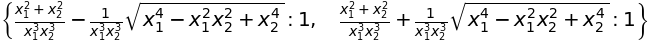

In [6]:
#Definimos la función
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
f=1/(x1*x2) 

#Calculamos el Hessiano
hess=hessian(f,x1,x2)
hess_val=sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


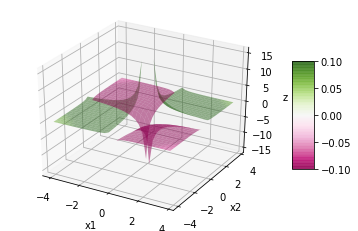

In [7]:
#Graficamos la función y sus líneas de contorno 

xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

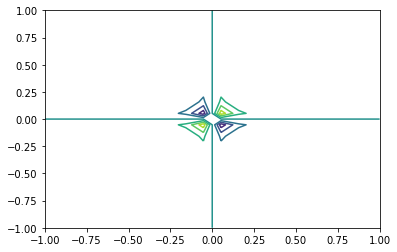

In [77]:
"""xmax = 1
delta = 1.5
xx = np.arange(-xmax, xmax, delta)
yy = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(xx, yy)"""
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

#F = sp.lambdify([x1,x2],f)
#Z = F(X,Y)

Z = 1/(X*Y)

c = plt.contour(X, Y, Z)

## (b)

La matriz Hessiana es:


⎡     -2  ⎤
⎢ 0   ─── ⎥
⎢       3 ⎥
⎢     x₂  ⎥
⎢         ⎥
⎢-2   6⋅x₁⎥
⎢───  ────⎥
⎢  3    4 ⎥
⎣x₂   x₂  ⎦



Los valores propios de la matriz son: 



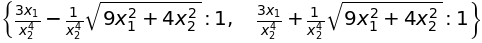

In [53]:
#Definimos la función
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
f=x1/(x2**2) 

#Calculamos el Hessiano
hess=hessian(f,x1,x2)
hess_val=sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


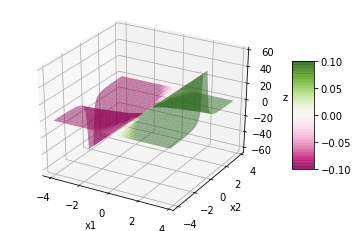

In [56]:
#Graficamos la función y sus líneas de contorno 

xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

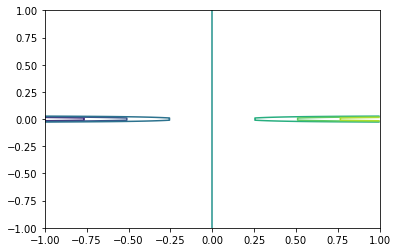

In [70]:
x = np.linspace(-1, 1, 250)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

#F = sp.lambdify([x1,x2],f)
#Z = F(X,Y)

Z = X/(Y**2)

c = plt.contour(X, Y, Z)

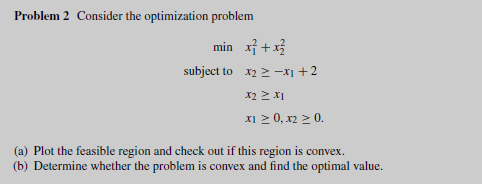